Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics



%matplotlib inline

# for providing path
import os

In [4]:
data = pd.read_csv("C:/Users/BRAIN/Documents/Flask Projects/CrimePA/dataset/crime.csv")

In [5]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [6]:
data.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,38.0,13XX BLOCK PARK DR,Marpole,490204.00,5451444.00,49.215706,-123.134512


In [7]:
data.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
data.shape

(530652, 12)

In [9]:
data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [10]:
data.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [11]:
updated_df = data.dropna(axis=0)


In [421]:
updated_df.drop(['HUNDRED_BLOCK'], inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [422]:
updated_df.drop(['X','Y','Latitude','Longitude'], inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [423]:
updated_df.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
NEIGHBOURHOOD    0
dtype: int64

In [424]:
#visualization

In [425]:
updated_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,15.0,Strathcona
1,Other Theft,2003,5,7,15.0,20.0,Strathcona
2,Other Theft,2003,4,23,16.0,40.0,Strathcona
3,Other Theft,2003,4,20,11.0,15.0,Strathcona
4,Other Theft,2003,4,12,17.0,45.0,Strathcona


Analysis of the data
1. No of neighbourhoods


In [426]:
print('There are ' + str(updated_df.NEIGHBOURHOOD.nunique()) + ' listed neighbourhoods, and they are:')
print(updated_df.NEIGHBOURHOOD.unique())

There are 24 listed neighbourhoods, and they are:
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge']


2. No. of crimes per neighbourhood

In [427]:
nc = pd.DataFrame([updated_df['YEAR'], updated_df['NEIGHBOURHOOD'], updated_df['TYPE']]).T 


In [428]:
ncavg = nc.groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index()
ncavg.head()

,YEAR,NEIGHBOURHOOD,TYPE
0,2003,Arbutus Ridge,616
1,2003,Central Business District,9818
2,2003,Dunbar-Southlands,773
3,2003,Fairview,3476
4,2003,Grandview-Woodland,3140


In [429]:
ncavg = ncavg.drop('YEAR', axis = 1)
ncavg.columns = ["Neighborhood", "Avg"]
ncavg = ncavg.groupby(['Neighborhood'])['Avg'].mean()
ncavg.head()

Neighborhood
Arbutus Ridge                 404.400000
Central Business District    7396.333333
Dunbar-Southlands             516.400000
Fairview                     2144.066667
Grandview-Woodland           1812.000000
Name: Avg, dtype: float64

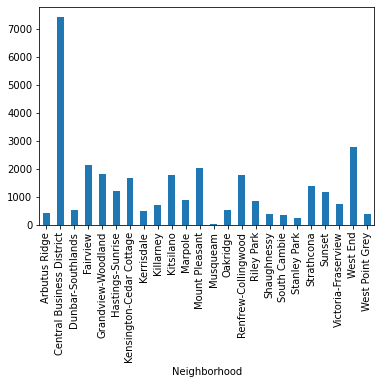

In [430]:
plotnc = ncavg.plot(kind = 'bar')

3. Crimes per Year

In [431]:
yc = pd.DataFrame([updated_df['YEAR'], updated_df['TYPE']]).T
yc.head()

,YEAR,TYPE
0,2003,Other Theft
1,2003,Other Theft
2,2003,Other Theft
3,2003,Other Theft
4,2003,Other Theft


In [432]:
ycTotal = yc.groupby(['YEAR']).count().reset_index()
ycTotal.columns = ['Year','Total']
ycTotal

,Year,Total
0,2003,45885
1,2004,45035
2,2005,40522
3,2006,37767
4,2007,33161
5,2008,31070
6,2009,28197
7,2010,25874
8,2011,24633
9,2012,25378


Text(0.5, 1.0, 'No. of crime per year in Vancouver')

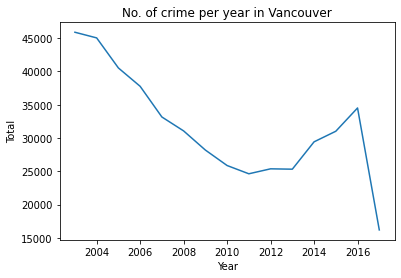

In [433]:
sns.lineplot(data=ycTotal, x="Year", y="Total").set_title('No. of crime per year in Vancouver')

4. Types of crimes and number

In [434]:
tc = pd.DataFrame(updated_df['TYPE'])
tc.head()

,TYPE
0,Other Theft
1,Other Theft
2,Other Theft
3,Other Theft
4,Other Theft


In [435]:
tcCount = tc['TYPE'].value_counts()
tcCount

Theft from Vehicle                                        170889
Mischief                                                   70157
Break and Enter Residential/Other                          60856
Other Theft                                                52160
Theft of Vehicle                                           38351
Break and Enter Commercial                                 33841
Theft of Bicycle                                           25620
Vehicle Collision or Pedestrian Struck (with Injury)       21887
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Name: TYPE, dtype: int64

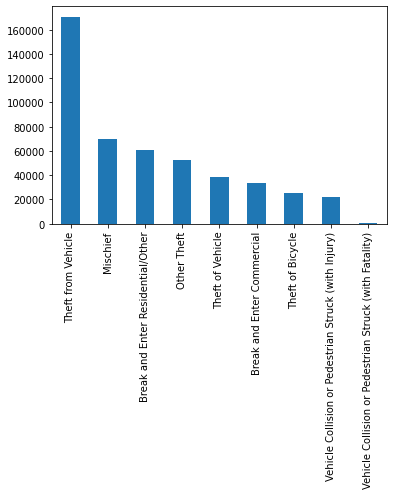

In [436]:
plottc = tcCount.plot(kind = 'bar')

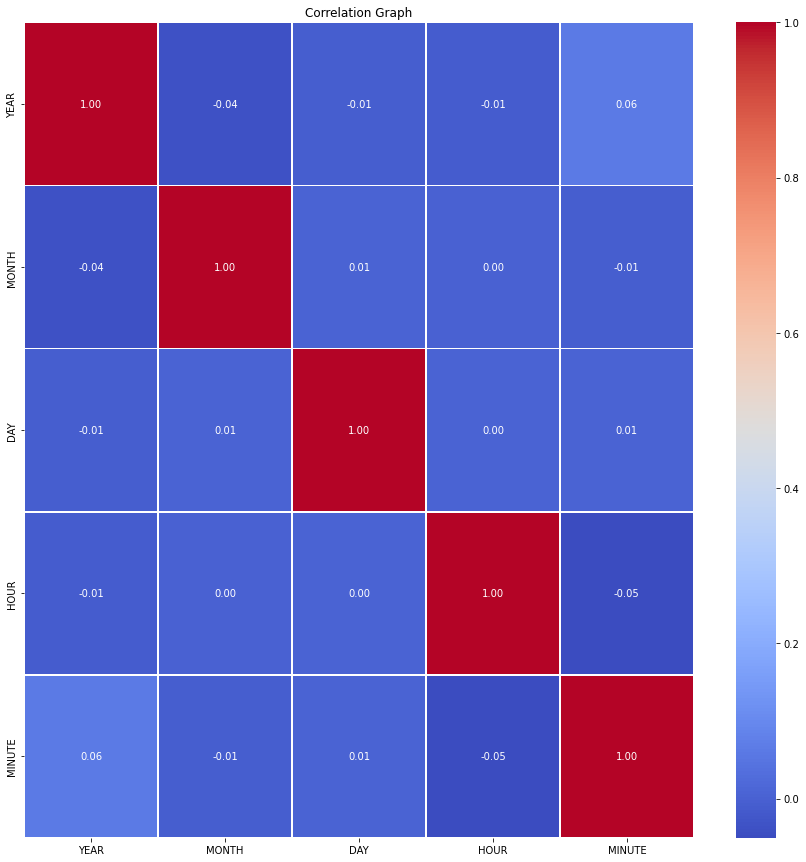

In [437]:
corr_matrix = updated_df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

Heatmap

In [438]:
mapObj= folium.Map(location=[49.246292, -123.116226],zoom_start=6)
mapObj.save('laPointMap.html')

In [439]:
heatmap_df=data[['YEAR','Latitude','Longitude']].copy()

In [440]:
print(heatmap_df)

        YEAR   Latitude   Longitude
0       2003  49.269802 -123.083763
1       2003  49.269802 -123.083763
2       2003  49.269802 -123.083763
3       2003  49.269802 -123.083763
4       2003  49.269802 -123.083763
...      ...        ...         ...
530647  2017  49.277420 -123.037595
530648  2017  49.264163 -123.075129
530649  2017   0.000000    0.000000
530650  2017  49.278168 -123.117031
530651  2017  49.215706 -123.134512

[530652 rows x 3 columns]


In [498]:
heatmap_df2017=heatmap_df.query('YEAR==2017')

In [500]:
heatmap_df2017.head()

,YEAR,Latitude,Longitude
512795,2017,49.287725,-123.127554
512796,2017,0.000000,0.000000
512797,2017,0.000000,0.000000
512798,2017,49.287677,-123.027623
512799,2017,49.278544,-123.126168


In [502]:
heatmap_2017=heatmap_df2017[['Latitude','Longitude']].copy()

In [503]:
heat_array=heatmap_2017.to_numpy()
print(heat_array)

[[  49.28772481 -123.1275542 ]
 [   0.            0.        ]
 [   0.            0.        ]
 ...
 [   0.            0.        ]
 [  49.2781684  -123.1170307 ]
 [  49.21570644 -123.1345121 ]]


In [504]:
HeatMap(heat_array).add_to(mapObj)

# save the map object as html
mapObj.save("output.html")

Encoding

In [443]:
le = LabelEncoder()

In [444]:
le2 = LabelEncoder()

In [445]:
updated_df['TYPE']= le.fit_transform(updated_df['TYPE'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [446]:
updated_df['TYPE'].nunique()

9

In [447]:
updated_df['NEIGHBOURHOOD']= le2.fit_transform(updated_df['NEIGHBOURHOOD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [448]:
updated_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,3,2003,5,12,16.0,15.0,19
1,3,2003,5,7,15.0,20.0,19
2,3,2003,4,23,16.0,40.0,19
3,3,2003,4,20,11.0,15.0,19
4,3,2003,4,12,17.0,45.0,19


Splitting the data and target

In [449]:
X = updated_df.iloc[:,1:]


In [450]:
X.head()


,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,2003,5,12,16.0,15.0,19
1,2003,5,7,15.0,20.0,19
2,2003,4,23,16.0,40.0,19
3,2003,4,20,11.0,15.0,19
4,2003,4,12,17.0,45.0,19


In [451]:
Y = updated_df.iloc[:,0]


In [452]:
Y.head()

0    3
1    3
2    3
3    3
4    3
Name: TYPE, dtype: int64

In [453]:
print(le.inverse_transform(Y))

['Other Theft' 'Other Theft' 'Other Theft' ... 'Mischief'
 'Theft from Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)']


In [454]:
X, Y = make_classification(n_samples=15000, n_features=6, n_informative=6, n_redundant=0, n_classes=9, random_state=1)


Splitting into training and testing data

In [455]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [456]:
# scaler = MaxAbsScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [457]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


Creating the Models

1. Logistic Regression

In [458]:
classifier = LogisticRegression(multi_class='multinomial', solver='saga', C=1.0, max_iter=200)


In [459]:
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', solver='saga')

In [460]:
predicted_y = classifier.predict(X_test)


In [461]:
print(predicted_y)

[1 1 2 ... 6 0 8]


In [462]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.41


In [463]:
cnf_matrix = metrics.confusion_matrix(Y_test, predicted_y)
cnf_matrix

array([[179,  28,  16,   2,  38,   4,  31,   7,  19],
       [  0, 176,  36,  27,   0,   2,   9,  37,  34],
       [ 20,  41, 178,   2,  12,   1,  55,  13,   1],
       [ 14,  60,   2, 159,  15,  24,  24,  17,  26],
       [ 64,  25,  31,  10,  77,   9,   6,  33,  69],
       [ 36,  16,  11,  21,  11,  56,  44,  54,  57],
       [ 20,  19,  31,  38,  31,  15, 160,   5,  20],
       [ 22,  31,  40, 105,  84,  29,  12,  46,   7],
       [ 14,   6,  11,  21,  46,  10,  36,   9, 193]])

In [464]:
print(metrics.precision_score(Y_test, predicted_y, average='micro'))
print(metrics.accuracy_score(Y_test, predicted_y))
print(metrics.recall_score(Y_test, predicted_y, average='micro'))
print(metrics.mean_absolute_error(Y_test, predicted_y))



0.408
0.408
0.408
2.0206666666666666


2. Naive Bayes Algorithm

In [465]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() 
nv.fit(X_train,Y_train) 

GaussianNB()

In [466]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) 

print(y_pred)

[1 1 2 ... 6 0 8]


In [467]:
#accuracy_score(Y_test,y_pred)

result = metrics.confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred)
print("Classification Report:")
print (result1)
print(metrics.precision_score(Y_test, y_pred, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.recall_score(Y_test, y_pred, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred))

Confusion Matrix:
[[176  26  10   8  49   8  18   2  27]
 [  3 183  25  18   6   2   5  48  31]
 [ 43  22 160   9  25   0  47  12   5]
 [ 38  48   3 162   6  29  22  20  13]
 [ 71  16  29  12  96   9   8  15  68]
 [ 53   8   4  14  34  81  36  23  53]
 [ 17  18  23  48  42   2 159   5  25]
 [ 26  23  48 118  93  21  10  28   9]
 [ 21   8  12  18  37  10  24   5 211]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.54      0.46       324
           1       0.52      0.57      0.54       321
           2       0.51      0.50      0.50       323
           3       0.40      0.48      0.43       341
           4       0.25      0.30      0.27       324
           5       0.50      0.26      0.35       306
           6       0.48      0.47      0.48       339
           7       0.18      0.07      0.10       376
           8       0.48      0.61      0.54       346

    accuracy                           0.42      3000
   macro av

3. KNN

In [468]:
from sklearn.neighbors import KNeighborsClassifier

In [469]:
knn_clf=KNeighborsClassifier(n_neighbors = 50)
knn_clf.fit(X_train,Y_train)
y_pred_knn=knn_clf.predict(X_test)

In [470]:

result = metrics.confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred_knn)
print("Classification Report:")
print (result1)
#result2 = accuracy_score(Y_test,y_pred_knn)
#print("Accuracy:",result2)
print(metrics.precision_score(Y_test, y_pred_knn, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred_knn))
print(metrics.recall_score(Y_test, y_pred_knn, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred_knn))

Confusion Matrix:
[[275   5  10   1   7   6  11   8   1]
 [  4 265   6  22   0   3   6   1  14]
 [ 12  11 262   0   7   9   5  15   2]
 [  9  18   1 265  11   6   0  28   3]
 [ 26   6  32  13 184  14   5  14  30]
 [ 14   8   4   8  10 212  13   7  30]
 [ 28  14  11  25  19   8 210  13  11]
 [  9   9   6  12  22  13   4 295   6]
 [  8  13  10  11   4  11  16  19 254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       324
           1       0.76      0.83      0.79       321
           2       0.77      0.81      0.79       323
           3       0.74      0.78      0.76       341
           4       0.70      0.57      0.63       324
           5       0.75      0.69      0.72       306
           6       0.78      0.62      0.69       339
           7       0.74      0.78      0.76       376
           8       0.72      0.73      0.73       346

    accuracy                           0.74      3000
   macro av

4. SVM

In [471]:
#from sklearn.svm import LinearSVC


In [472]:
# clf = LinearSVC(random_state=0, tol=1e-5)

In [473]:
# clf.fit(X_train, Y_train.ravel()) 

In [474]:
# y_pred_svc=clf.predict(X_test)

In [475]:
# result = metrics.confusion_matrix(Y_test, y_pred_svc)
# print("Confusion Matrix:")
# print(result)
# result1 = metrics.classification_report(Y_test,y_pred_svc)
# print("Classification Report:")
# print (result1)
# #result2 = accuracy_score(Y_test,y_pred_knn)
# #print("Accuracy:",result2)
# print(metrics.precision_score(Y_test, y_pred_svc, average='micro'))
# print(metrics.accuracy_score(Y_test, y_pred_svc))
# print(metrics.recall_score(Y_test, y_pred_svc, average='micro'))
# print(metrics.mean_absolute_error(Y_test, y_pred_svc))

5. Random Forest

In [476]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 2)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [477]:
y_pred_rf=classifier_rf.predict(X_test)

In [478]:
import pickle
pickle.dump(classifier_rf, open('rf_model.pkl', 'wb'))

In [479]:
# test = [2009,9,5,0,42,8,490245.93,5459326.44,49.28661123,-123.1341283]
test = [2009,9,5,0,42,8]

In [480]:
model = pickle.load(open('rf_model.pkl','rb'))
print(model.predict([test]))

[3]


In [481]:
y_pred_rf2=classifier_rf.predict([test,test])

In [482]:
print(y_pred_rf2)

[3 3]


In [483]:
# print(le.inverse_transform(y_pred_rf2))
print(le2.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))
print(le.inverse_transform([0,1,2,3,4,5,6,7,8]))

['Arbutus Ridge' 'Central Business District' 'Dunbar-Southlands'
 'Fairview' 'Grandview-Woodland' 'Hastings-Sunrise'
 'Kensington-Cedar Cottage' 'Kerrisdale' 'Killarney' 'Kitsilano' 'Marpole'
 'Mount Pleasant' 'Musqueam' 'Oakridge' 'Renfrew-Collingwood' 'Riley Park'
 'Shaughnessy' 'South Cambie' 'Stanley Park' 'Strathcona' 'Sunset'
 'Victoria-Fraserview' 'West End' 'West Point Grey']
['Break and Enter Commercial' 'Break and Enter Residential/Other'
 'Mischief' 'Other Theft' 'Theft from Vehicle' 'Theft of Bicycle'
 'Theft of Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Fatality)'
 'Vehicle Collision or Pedestrian Struck (with Injury)']


In [484]:
print(y_pred_rf)

[1 3 2 ... 2 0 5]


In [485]:
result = metrics.confusion_matrix(Y_test, y_pred_rf)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred_rf)
print("Classification Report:")
print (result1)
#result2 = accuracy_score(Y_test,y_pred_rf)
#print("Accuracy:",result2)
print(metrics.precision_score(Y_test, y_pred_rf, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred_rf))
print(metrics.recall_score(Y_test, y_pred_rf, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred_rf))

Confusion Matrix:
[[253   7   5   3  21  12  15   8   0]
 [  5 272   7  14   1   3   8   0  11]
 [  6  13 260   0   8  12   8  14   2]
 [  4  18   3 267  15   5   7  20   2]
 [ 24   9  28  14 192  16   9  14  18]
 [ 12   5   5  11  18 215  10   5  25]
 [ 19  15  13  19  21   8 223   5  16]
 [  7   8  14  17  30  10   5 277   8]
 [  7  13  11   8  12  13  12  16 254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       324
           1       0.76      0.85      0.80       321
           2       0.75      0.80      0.78       323
           3       0.76      0.78      0.77       341
           4       0.60      0.59      0.60       324
           5       0.73      0.70      0.72       306
           6       0.75      0.66      0.70       339
           7       0.77      0.74      0.75       376
           8       0.76      0.73      0.74       346

    accuracy                           0.74      3000
   macro av